<a href="https://colab.research.google.com/github/jem-thanmay/spark2/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sparks Foundation Internship - Data Science and Business Analytics.

**TASK 2 - For the given Iris Dataset, predict the optimum number of clusters and represent it visually.**

Thanmay Jembige


In [32]:
# importing the required libraries.

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# uploading the dataset file.
df = pd.read_csv("/content/Iris (1).csv")
print("Shape: ",df.shape)  #gives the number of rows and columns.

Shape:  (150, 6)


In [3]:
df.head()   # only first 5 because for simplicity.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.head(15)   # first 15

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# to remove the id axis we use drop() because its not important.
df.drop('Id', axis = 1 ,inplace=True)  # axis is 1 , column and axis is 0, row
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()   # gives some information about the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull()    # checking for missing data.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.isnull().sum()   #sumarizing everything or getting all the missing data together.

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.columns  # displayes the column headers.

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df['Species'].value_counts()  # species of Iris.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
df.describe()  # describe() is used to get statistical values like mean , std , min and max.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***Box Plot*** shows ***summary statistics*** such as ***Mean / Median***

Text(0.5, 1.0, 'Box Plot')

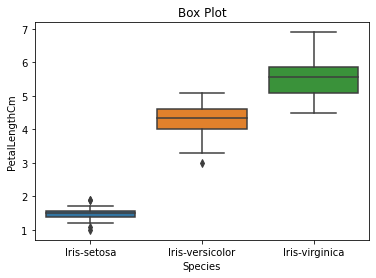

In [12]:
 sb.boxplot(x = 'Species' , y='PetalLengthCm', data = df).set_title("Box Plot")  # creating a box plot based on Petal Length - PetalLengthCm

Text(0.5, 1.0, 'Box Plot')

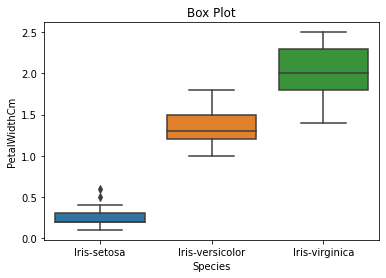

In [13]:
sb.boxplot(x = 'Species' , y='PetalWidthCm', data = df).set_title("Box Plot")  # creating a box plot based on Petal Width - PetalWidthCm

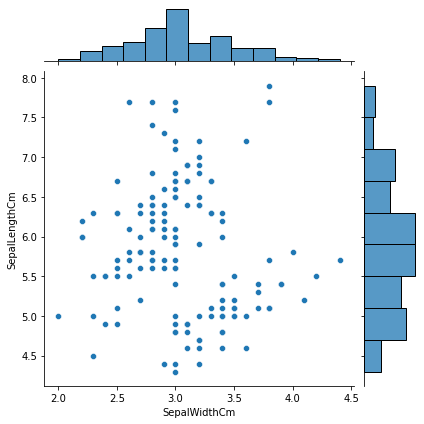

In [33]:
sb.jointplot(x = 'SepalWidthCm' , y = 'SepalLengthCm', data = df, height = 6)

***Violin plot*** gives the ***full description*** of the data.

Text(0.5, 1.0, 'Violin Plot')

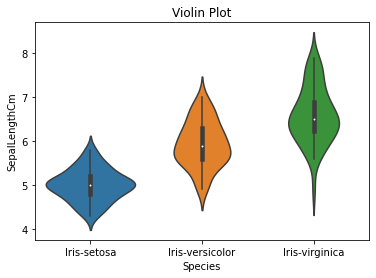

In [15]:
sb.violinplot(x = 'Species' , y = 'SepalLengthCm', data = df, size = 4).set_title("Violin Plot")  # based on Sepal Length - SepalLengthCm

Text(0.5, 1.0, 'Violin Plot')

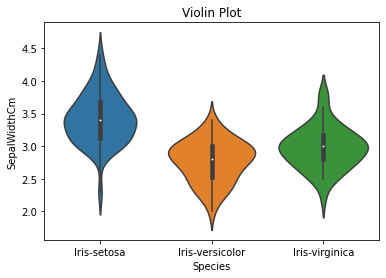

In [16]:
sb.violinplot(x = 'Species' , y = 'SepalWidthCm', data = df, size = 4).set_title("Violin Plot")  # based on Sepal width - SepalWidthCm

A ***heatmap*** contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

Text(0.5, 1.0, 'Heat Map')

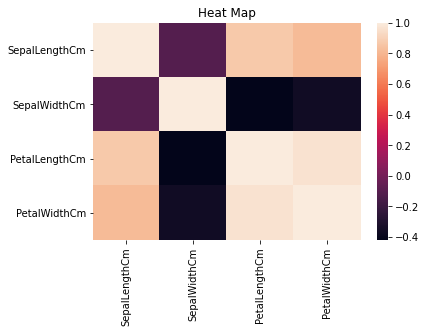

In [17]:
sb.heatmap(df.corr(),).set_title("Heat Map")

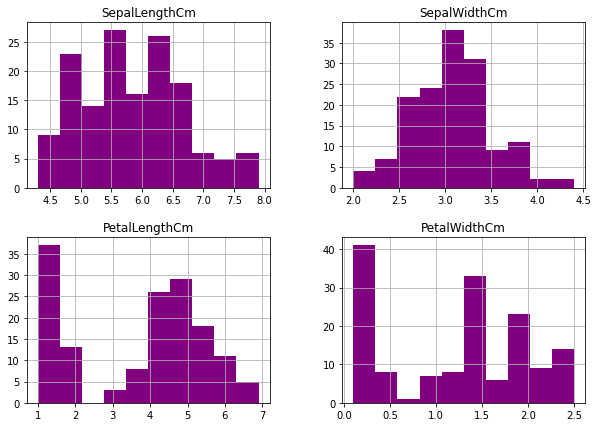

In [18]:
df.hist(figsize = (10,7), color = 'purple')   # plotting a histogram 
plt.show()

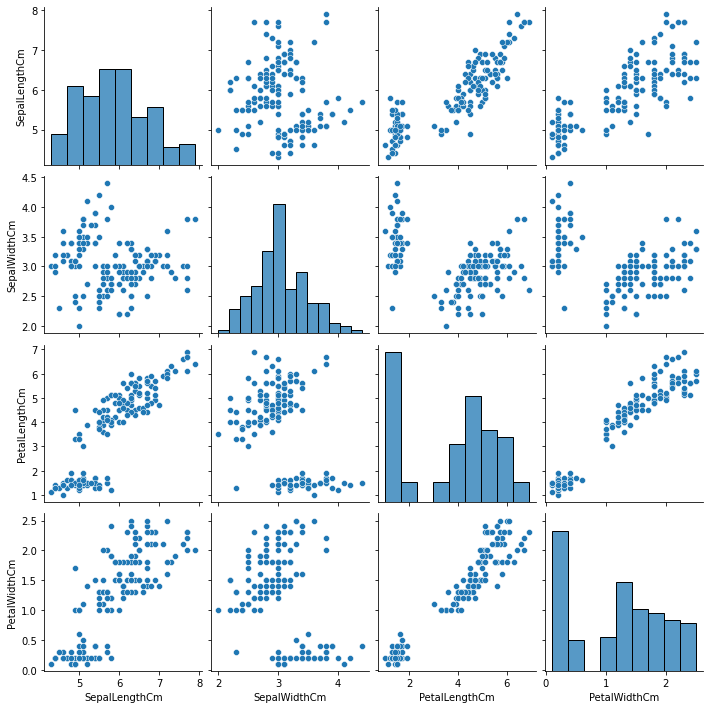

In [19]:
sb.pairplot(data = df, kind = 'scatter')  # scatterplot

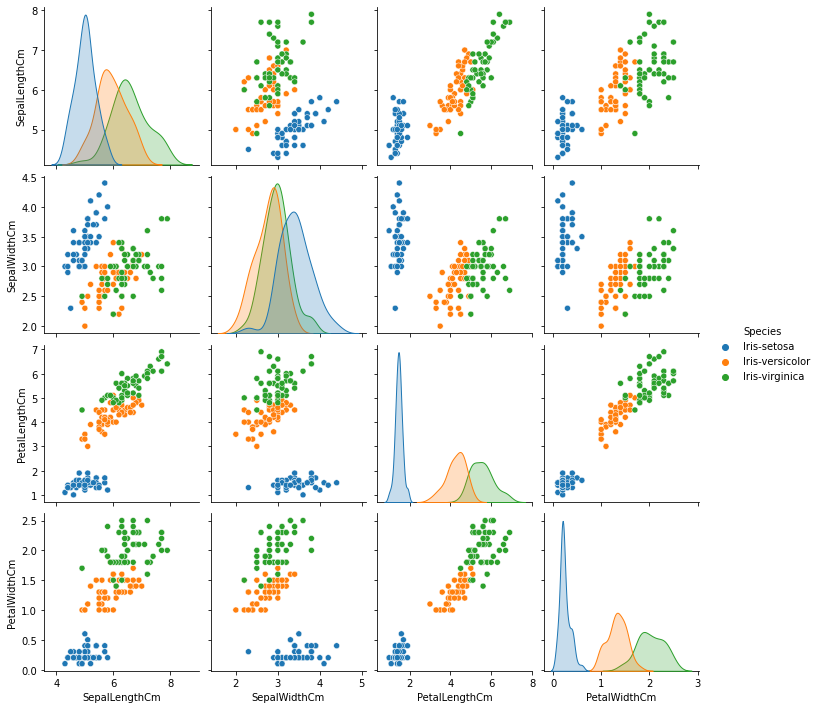

In [20]:
sb.pairplot(data = df, hue = 'Species')  # species graph plotted for all attributes and all thre species.

Finding the value of k or the number of optimum clusters using the Elbow Method.

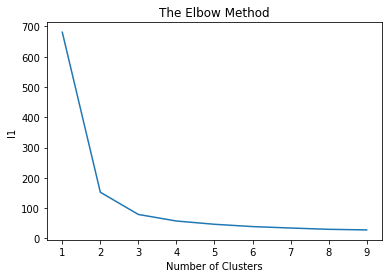

In [21]:
from sklearn.cluster import KMeans
l1 = []
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init =10,random_state = 0)
  kmeans.fit(x)
  l1.append(kmeans.inertia_)
plt.plot(range(1,10),l1)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("l1")
plt.show() 

We see in the above graph that the elbow is formed at 3. 

In [23]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(x)

In [24]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


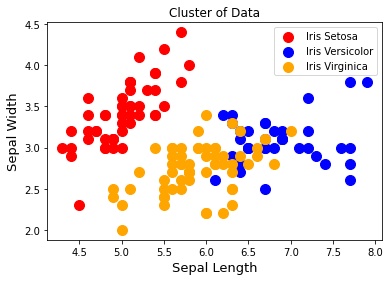

In [35]:
#plotting the satter plot for the clusters of data.
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label = "Iris Setosa")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label = "Iris Versicolor")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='orange', label = "Iris Virginica")
plt.title("Cluster of Data")
plt.xlabel("Sepal Length",fontsize = 13)
plt.ylabel("Sepal Width",fontsize = 13)
plt.legend()
plt.show()